# Assignment 4 - 10/12/2024

**Objective:** Learn and apply statistical analysis techniques using Python, focusing on descriptive and inferential statistics, and the derivation of Ordinary Least Squares (OLS) models. 
**Dataset:**  Utilize the 'General Social Survey' (GSS) dataset, which contains data on social attitudes and behaviors collected over several decades. This dataset is relevant for social science and is accessible from the National Opinion Research Center (NORC) at the University of Chicago (GSS Data Explorer).

Tasks: 
1. Load and Explore the Dataset:
- Download the GSS dataset and import it into a Python environment using Pandas.
- Perform initial data exploration–display the first few rows, understand the variables, and check for missing values.

In [336]:
import pandas as pd
import numpy as np

#I import data and check the first 10 rows of the data.
gss = pd.read_sas("C:/Users/belki/OneDrive - marmara.edu.tr/Masaüstü/Advanced Data Analysis/Datasets/GSS_2022_stata/2022/gss2022.sas7bdat")
#I import stata version of the data first as it was in github then I realized many variables are coded as objects.
#So I went to the norc gss webpage to check if it is the case for other versions too (because I remember it was not at least for spss version).
#Then I found out that sas version is coded as numeric, that's why I use sas version of the data. 
print(gss.columns) #to see all variables 
print(gss.isnull().sum()) #to see how many missings data has. 
#I can do both with".tolist()" operation to list them all but since it is too long I did not.

     YEAR    ID  WRKSTAT  HRS1  HRS2  EVWORK  WRKSLF   OCC10  PRESTG10  \
0  2022.0   1.0      1.0  40.0   NaN     NaN     2.0   430.0      39.0   
1  2022.0   2.0      5.0   NaN   NaN     1.0     2.0    50.0      53.0   
2  2022.0   3.0      1.0  52.0   NaN     NaN     2.0  4610.0      48.0   
3  2022.0   4.0      3.0   NaN  25.0     NaN     2.0  4120.0      34.0   
4  2022.0   5.0      8.0   NaN   NaN     1.0     2.0  7330.0      38.0   
5  2022.0   6.0      1.0  50.0   NaN     NaN     2.0  4610.0      48.0   
6  2022.0   7.0      2.0  30.0   NaN     NaN     2.0  1105.0      61.0   
7  2022.0   8.0      1.0  40.0   NaN     NaN     2.0  2200.0      74.0   
8  2022.0   9.0      1.0  31.0   NaN     NaN     2.0  4110.0      31.0   
9  2022.0  10.0      5.0   NaN   NaN     1.0     2.0  3600.0      48.0   

   PRESTG105PLUS  ...  FAMGEN_EXP  HHTYPE1_EXP  BATCH  SUBSAMPRATE  \
0           42.0  ...         NaN          NaN    NaN          1.0   
1           73.0  ...         NaN          Na

2. Descriptive Statistics: 
- Calculate basic descriptive statistics (mean, median, standard deviation, etc.) for key variables. 
- Create simple visualizations (histograms, box plots) to understand the distribution of selected variables. 

In [162]:
# I print descriptive statistics of basic variables.
gss[["AGE","SEX","MARITAL","AGE","EDUC","WRKSTAT","RINCOME"]].describe().T

,count,mean,std,min,25%,50%,75%,max
AGE,3893.0,48.244541,17.746931,18.0,33.0,47.0,63.0,89.0
SEX,4126.0,1.537082,0.498683,1.0,1.0,2.0,2.0,2.0
MARITAL,4133.0,2.767723,1.735890,1.0,1.0,3.0,5.0,5.0
AGE,3893.0,48.244541,17.746931,18.0,33.0,47.0,63.0,89.0
EDUC,4120.0,14.152913,2.907561,0.0,12.0,14.0,16.0,20.0
WRKSTAT,4140.0,3.069565,2.341469,1.0,1.0,2.0,5.0,8.0
RINCOME,2345.0,10.896802,2.422610,1.0,11.0,12.0,12.0,12.0


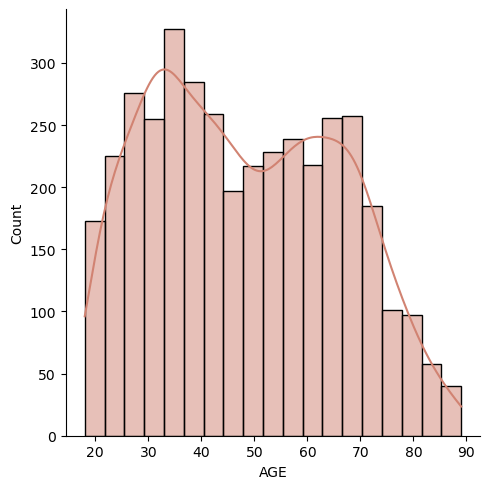

In [164]:
import seaborn as sns
import matplotlib.pyplot as plt
#I visualize selected variables.
sns.displot(x="AGE", data=gss, color="#d18372", kde=True)

<Axes: xlabel='SEX', ylabel='count'>

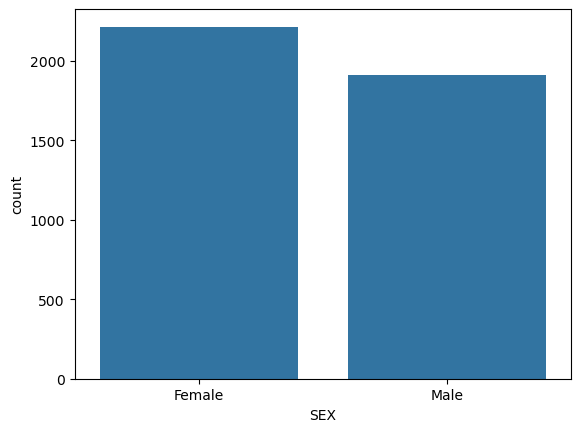

In [166]:
labels = {1: "Male", 2: "Female"} #first I add labels
gss["SEX"] = gss["SEX"].map(labels)
sns.countplot(x="SEX", data=gss) #a bar plot for educ since it is categorical

C:\Users\belki\AppData\Local\Temp\ipykernel_39692\3376983189.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(x="RINCOME", data=gss, shade=True, color="#650b00")


Text(0, 0.5, 'Density')

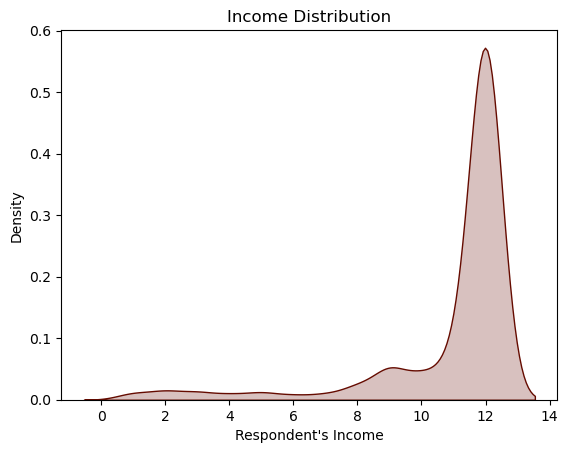

In [168]:
sns.kdeplot(x="RINCOME", data=gss, shade=True, color="#650b00")
plt.title("Income Distribution")
plt.xlabel("Respondent's Income")
plt.ylabel("Density")

3. Inferential Statistics: 
- Perform a hypothesis test (e.g., t-test) to compare two groups within the dataset on a variable of interest. 
- Calculate confidence intervals for key statistics. 

In [52]:
#First I need to check how many categories I have so I need to decide what kind of analysis I can do.
print(gss["WRKSTAT"].unique()) 

[ 1.  5.  3.  8.  2.  7.  4.  6. nan]


In [206]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
#Since there are more than 2 groups I need to do one way ANOVA.
anova = ols("RINCOME ~ WRKSTAT", data=gss_n).fit()
anova_table = anova_lm(model)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
WRKSTAT,1.0,1143.235592,1143.235592,212.598458,3.691470e-46
Residual,2341.0,12588.588566,5.377441,NaN,NaN


In [208]:
confidence_interval = anova.conf_int(alpha=0.05)  # Since 95% confidence interval means alpha=0.05
print(confidence_interval)

                   0          1
Intercept  11.550940  11.835564
WRKSTAT    -0.498878  -0.380597


4. Correlation Analysis: 
- Analyze the correlation between two or more variables (e.g., income and education level). 
- Represent these relationships through scatter plots or correlation matrices. 

Correlation: 0.23411209955828424


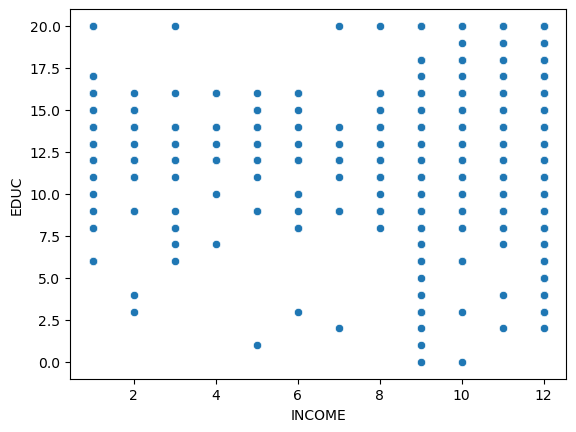

In [260]:
#I run a correlation between working status and respondent's income.
correl = gss["EDUC"].corr(gss["INCOME"])
print("Correlation:", correl)
#The I show it on a scatterplot.
correl_scatter= sns.scatterplot(x="INCOME", y="EDUC", data=gss)


5. Regression Analysis: 
- Derive an OLS regression model to examine the relationship between a dependent  variable and one or more independent variables. 
- Interpret the coefficients of the model, and discuss the fit and predictive capabilities. 

In [326]:
print(gss_n.dtypes)

YEAR             float64
ID               float64
WRKSTAT          float64
HRS1             float64
HRS2             float64
                  ...   
WTSSNRPS_NEA     float64
WTSSPS_NEXT      float64
WTSSNRPS_NEXT    float64
WTSSPS_AS        float64
WTSSNRPS_AS      float64
Length: 1185, dtype: object


In [338]:
#First I convert sex, age and education variables to categoric variables because they were object and not proper to analyze.
gss["AGE"] = gss["AGE"].astype("category")
gss["SEX"] = gss["SEX"].astype("category")
gss["EDUC"] = gss["EDUC"].astype("category")
#Then I clear data from NaNs.
gss_n = gss.dropna(subset=["RINCOME", "EDUC", "HRS2", "WRKSTAT", "SEX", "AGE", "MARITAL"])

In [340]:

#I run an OLS regression model with respondent's income as the dependent variable and education level, age, sex, working status, usually working hours in a week and marital status are the independents.
y = gss_n["RINCOME"]
x = gss_n[["EDUC","HRS2","WRKSTAT","SEX","AGE","MARITAL"]]
x = sm.add_constant(x)

In [362]:
ols_reg = sm.OLS(y, x)
ols_res =ols_reg.fit()
ols_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                RINCOME   R-squared:                       0.186
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     3.801
Date:                Tue, 10 Dec 2024   Prob (F-statistic):            0.00378
Time:                        22:36:18   Log-Likelihood:                -197.21
No. Observations:                  89   AIC:                             406.4
Df Residuals:                      83   BIC:                             421.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
EDUC           0.0136      0.083      0.163      0.871      -0.152       0.180
HRS2           0.0480      0.018      2.694      0.009       0.013       0.083
WRKSTAT        2.4095      0.584      4.128      0.000       1.248       3.571
SEX            0.2990      0.526      0.569      0.571      -0.747       1.345
AGE            0.0413      0.020      2.087      0.040       0.002       0.081
MARITAL       -0.2669      0.137     -1.941      0.056      -0.540       0.007
==============================================================================
Omnibus:                       51.676   Durbin-Watson:                   2.301
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.223
Skew:                          -2.093   Prob(JB):                     1.77e-32
Kurtosis:                       7.680   Cond. No.                         169.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

**Interpretation:**
The regression analysis investigates the relationship between respondent's income (dependent variable) with age, sex, marital status, working hours, and working status (independent variables). The R square is 0.186 which means that the model explains 18.6% of the variance in respondent's income.
Working hours have a positive (β=0.0480) and statistically significant (p=0.009) effect on respondent's income. This means that more hours worked is associated with higher income. Working status also has a positive (β=2.409) and statistically significant (p=0.000) effect, while marital status has significant but a negative (β=−0.266) effect on income. Age has a weak but positive (β=0.043) and significant (p=0.04) effect on income. That means each unit increase in age causes a 0.043 unit increase in income. On the other hand, sex (p=571) and education (p=0.871) are statistically insignificant.

6. Model Diagnostics: 
- Perform diagnostic tests to check the validity of the OLS model assumptions (linearity, homoscedasticity, normality, etc.). 
- Address any issues found in the diagnostics through transformations or adjustments to the model. 


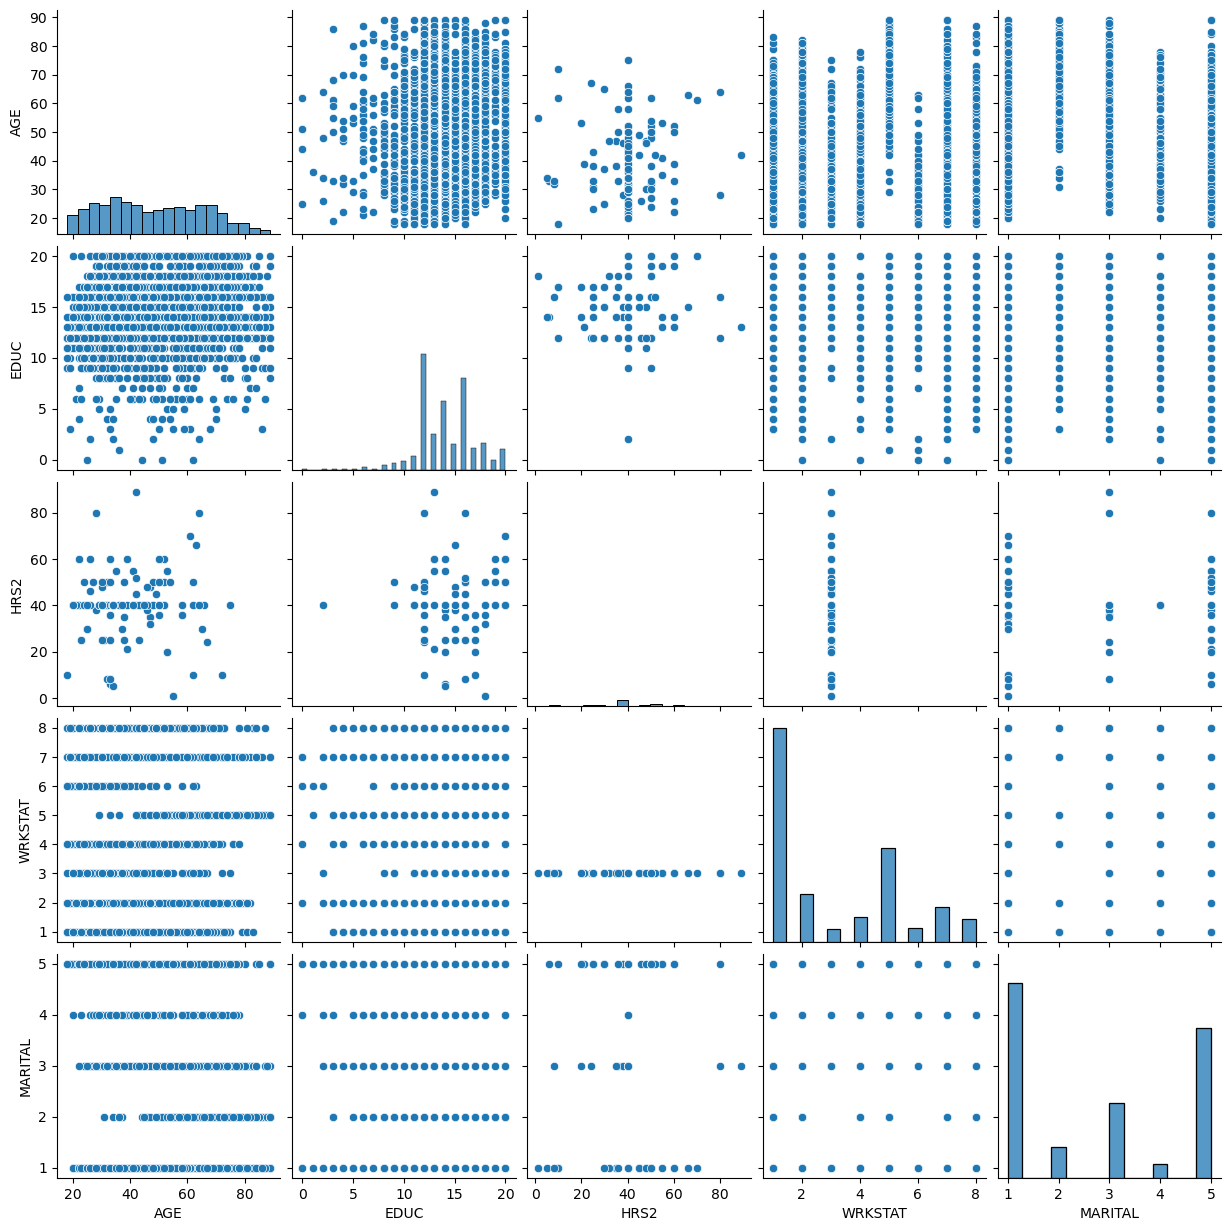

In [348]:
#First I check colinearity to determine if I have some variables with high correlation.
sns.pairplot(X[["AGE", "SEX", "EDUC", "HRS2", "WRKSTAT", "MARITAL"]]) #Good news, no collinearity according to the plots

In [381]:
#I chose to use Kolagorov-Smirnov for normality test since data has a big sample size and import proper library.
from scipy.stats import kstest, norm
stat, p_value = kstest(residuals, "norm")
print(stat)
print(p_value)
#According to the test results (p=0.23>0.05) I do not reject the null hypothesis which means that the data has a normal distribution.

0.23727510903900978
6.824601260448371e-05
